<a href="https://colab.research.google.com/github/vengie/Project42_ELOGISTIX/blob/main/Notebooks/logistix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [73]:
data_url='https://raw.githubusercontent.com/vengie/Project42_ELOGISTIX/main/Data/DSMMProject42-CPL-5559-Ecom_Shipping_stride.csv'
data = pd.read_csv(data_url)
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [74]:
print(data.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [75]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [76]:
print(data.describe())

                ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16

In [77]:
# Check for missing values
print(data.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


#Visualization

In [78]:
# Check for duplicates
print(data.duplicated().sum())


0


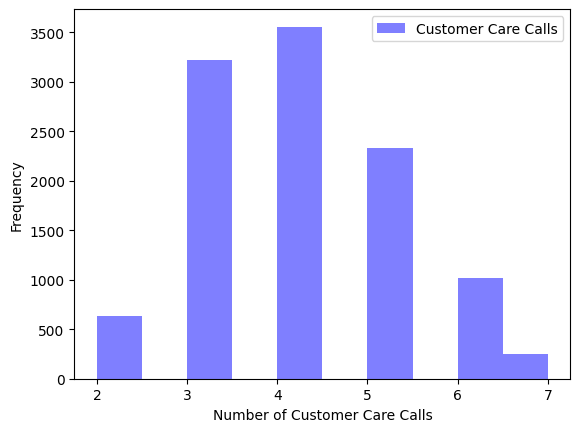

In [79]:
#Histograms help to understand the distribution of numerical variables in dataset
plt.hist(data['Customer_care_calls'], bins=10, alpha=0.5, color='blue', label='Customer Care Calls')
plt.xlabel('Number of Customer Care Calls')
plt.ylabel('Frequency')
plt.legend()
plt.show()

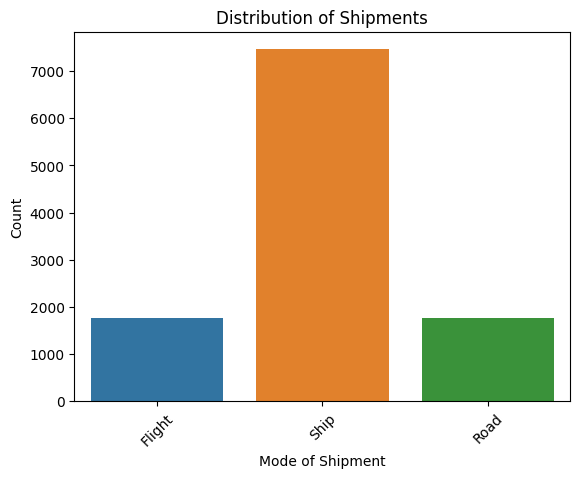

In [80]:
#bar charts to visualize categorical data or to compare different categories.
sns.countplot(x='Mode_of_Shipment', data=data)
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')
plt.title('Distribution of Shipments')
plt.xticks(rotation=45)
plt.show()

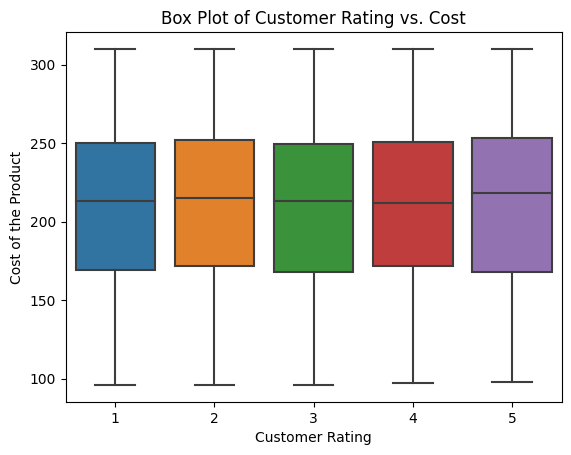

In [81]:
#Box plots can help understand the distribution and identify outliers in numerical data
sns.boxplot(x='Customer_rating', y='Cost_of_the_Product', data=data)
plt.xlabel('Customer Rating')
plt.ylabel('Cost of the Product')
plt.title('Box Plot of Customer Rating vs. Cost')
plt.show()

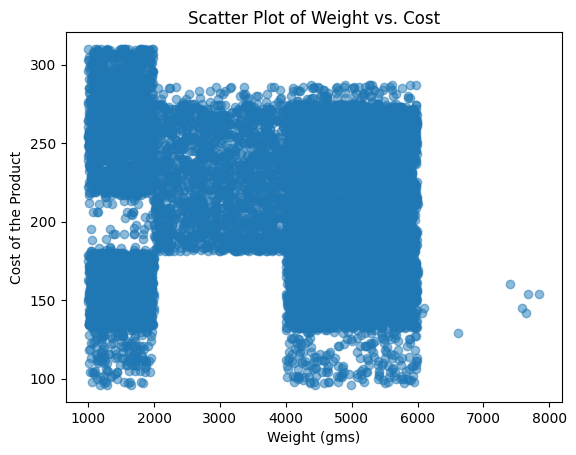

In [82]:
#Scatter plots for visualizing the relationship between two numerical variables
plt.scatter(data['Weight_in_gms'], data['Cost_of_the_Product'], alpha=0.5)
plt.xlabel('Weight (gms)')
plt.ylabel('Cost of the Product')
plt.title('Scatter Plot of Weight vs. Cost')
plt.show()


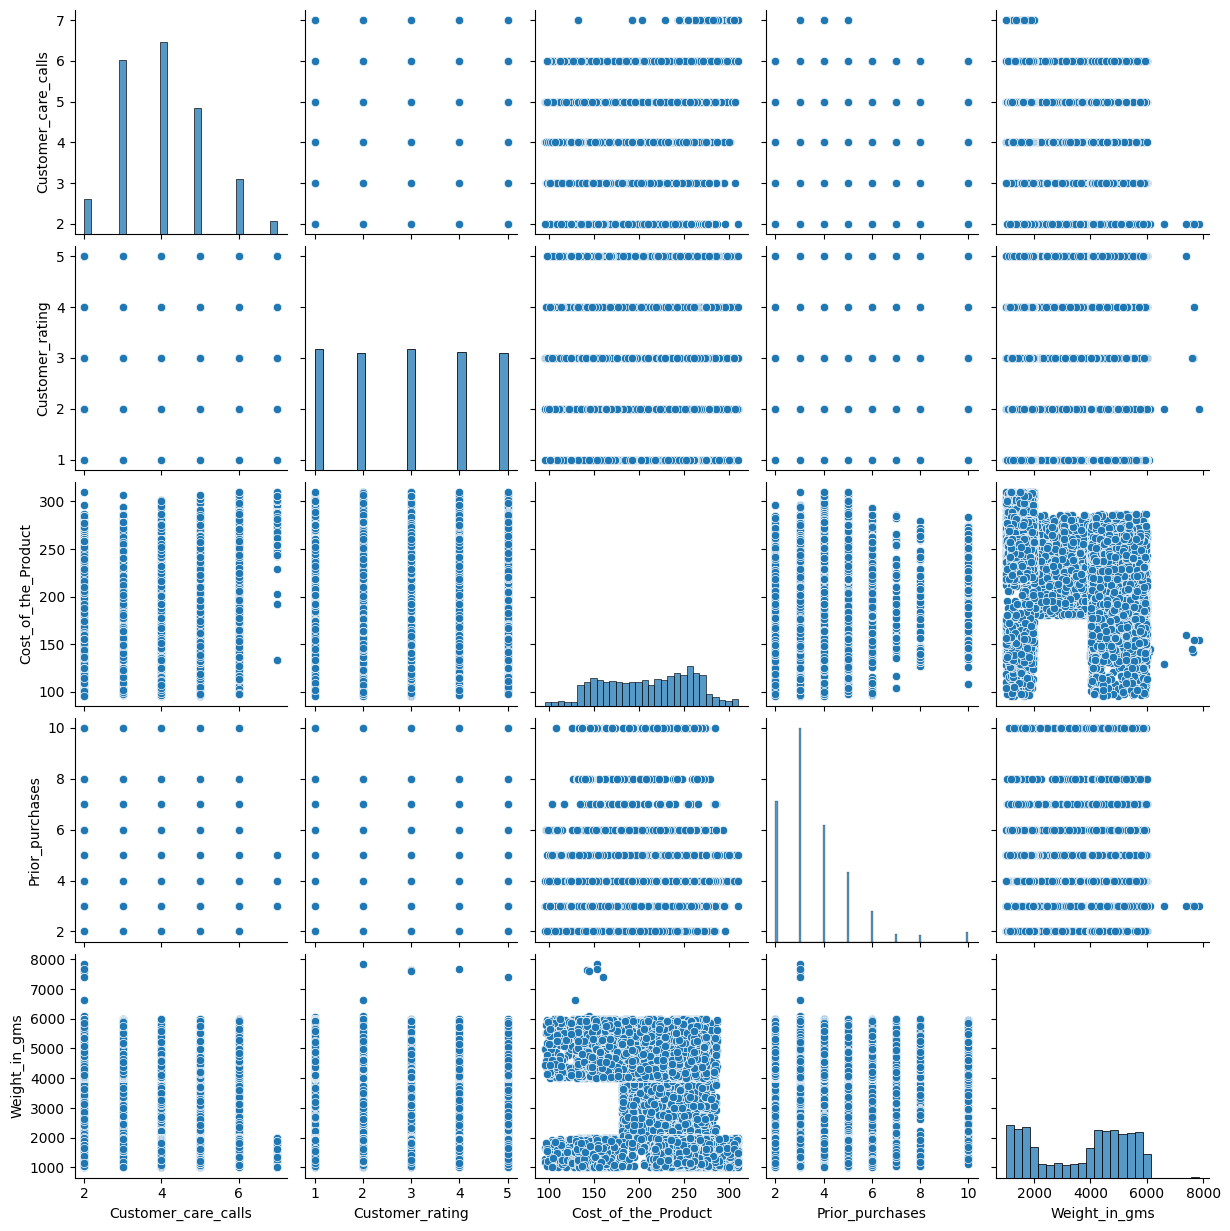

In [83]:
#Pair plots are excellent for visualizing relationships between multiple numerical variables
sns.pairplot(data[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms']])
plt.show()

<ipython-input-84-4ca1642c6e5a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


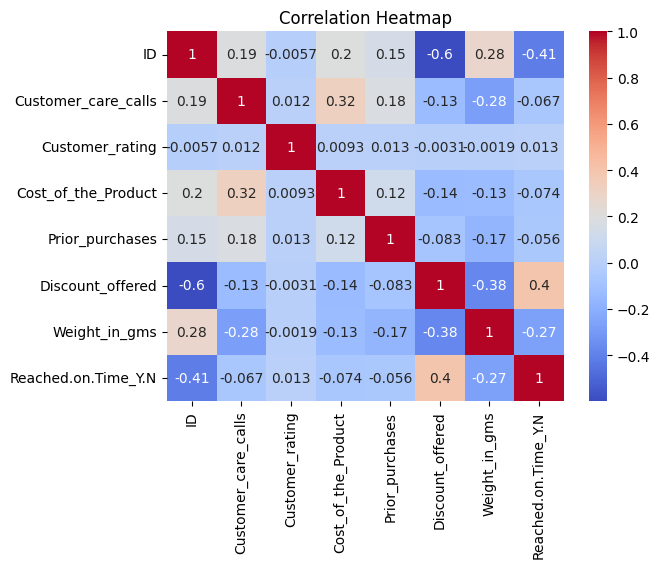

In [84]:
#Heatmaps can help visualize the correlation between numerical variables.
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

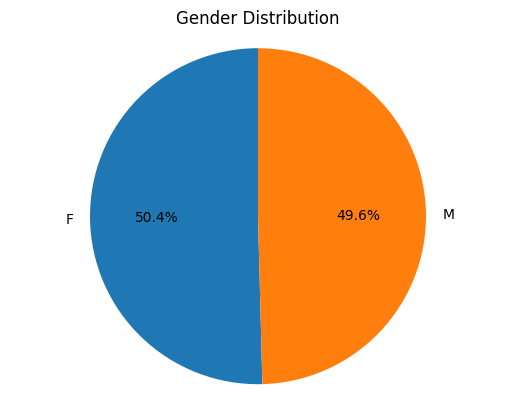

In [85]:
#pie charts to represent the distribution of categorical data
gender_counts = data['Gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

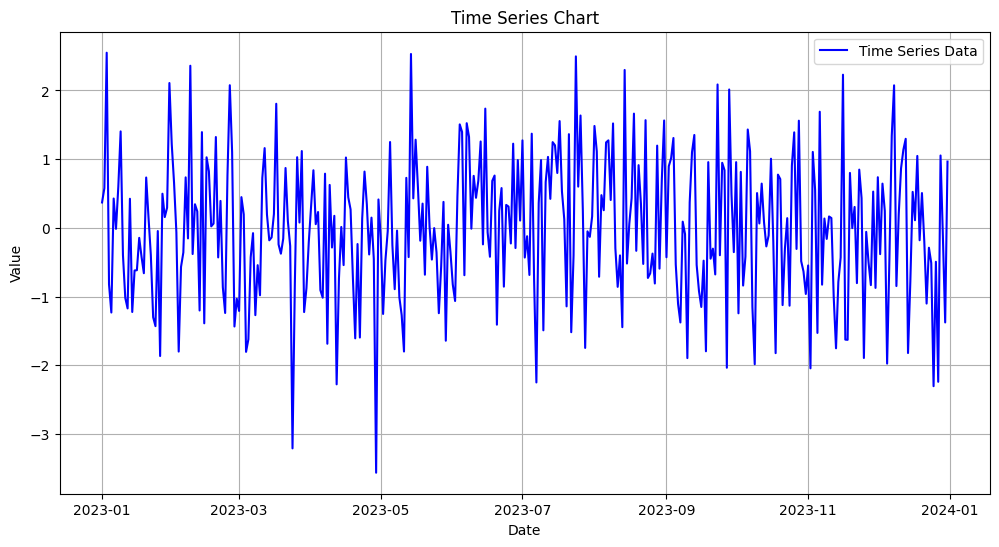

In [86]:
import pandas as pd
import numpy as np
# Generate synthetic time series data
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
time_series_data = np.random.randn(len(date_rng))

# Create a DataFrame with date and time series data
df = pd.DataFrame({'Date': date_rng, 'Value': time_series_data})

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Create a time series chart
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Time Series Data', color='b')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Chart')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [88]:
# # Load your cleaned dataset
# data = pd.read_csv('project data.csv')

In [89]:
# Encode categorical variables using Label Encoding for non-binary categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [90]:
# Separate features (X) and target variable (y)
X = data.drop('Reached.on.Time_Y.N', axis=1)  # Adjust 'target_column' to your target variable
y = data['Reached.on.Time_Y.N']


In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
# Define a list of classifiers to compare
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


In [93]:
# Dictionary to store accuracy scores for each classifier
accuracy_scores = {}

In [94]:
# Loop through classifiers and evaluate accuracy using cross-validation
for clf_name, clf in classifiers.items():
    # Perform 5-fold cross-validation and compute accuracy scores
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Store the mean accuracy score in the dictionary
    accuracy_scores[clf_name] = scores.mean()

In [95]:

# Print the accuracy scores for each classifier
for clf_name, accuracy in accuracy_scores.items():
    print(f'{clf_name}: Mean Accuracy = {accuracy:.2f}')


Random Forest: Mean Accuracy = 0.66
Gradient Boosting: Mean Accuracy = 0.68
Support Vector Machine: Mean Accuracy = 0.69
Logistic Regression: Mean Accuracy = 0.66
Decision Tree: Mean Accuracy = 0.64


In [96]:
# Evaluate each classifier using cross-validation
results = {}
for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    results[clf_name] = scores.mean()


In [97]:
# Select the best classifier based on mean cross-validation accuracy
best_classifier = max(results, key=results.get)


In [98]:
# Train the selected best classifier on the full training data
best_model = classifiers[best_classifier]
best_model.fit(X_train, y_train)


SVC()

In [99]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)


In [100]:
# Evaluate the best model's accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model: {best_classifier}')
print(f'Accuracy on Test Set: {accuracy:.2f}')

Best Model: Support Vector Machine
Accuracy on Test Set: 0.69


NEURAL NETWORK

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
# Check the number of features in the dataset
num_features = X_train.shape[1]

In [103]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Input, Concatenate

In [104]:
# Deep Neural Network (DNN)
dnn_input = Input(shape=(num_features,))
dnn_output = Dense(64, activation='relu')(dnn_input)
dnn_output = Dense(32, activation='relu')(dnn_output)

In [105]:
# Wide Neural Network (Wide)
wide_input = Input(shape=(num_features,))
wide_output = Dense(32, activation='relu')(wide_input)

In [106]:
# Concatenate the outputs of the wide and deep parts
concatenated = Concatenate()([wide_output, dnn_output])

In [107]:
# Final output layer
output_layer = Dense(1, activation='sigmoid')(concatenated)

In [108]:
# Build the model
wdnn_model = Model(inputs=[wide_input, dnn_input], outputs=output_layer)

wdnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [109]:
# Train the WDNN
wdnn_model.fit([X_train, X_train], y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
220/220 [==============================] - 1s 2ms/step - loss: 0.5630 - accuracy: 0.6359 - val_loss: 0.5134 - val_accuracy: 0.6614
Epoch 2/20
220/220 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.6731 - val_loss: 0.5100 - val_accuracy: 0.6574
Epoch 3/20
220/220 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.6725 - val_loss: 0.4998 - val_accuracy: 0.6824
Epoch 4/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4982 - accuracy: 0.6791 - val_loss: 0.5004 - val_accuracy: 0.6830
Epoch 5/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4948 - accuracy: 0.6819 - val_loss: 0.4976 - val_accuracy: 0.6835
Epoch 6/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.6914 - val_loss: 0.5021 - val_accuracy: 0.6869
Epoch 7/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.6921 - val_loss: 0.4997 - val_accuracy: 0.6608
Epoch 

In [113]:
# Evaluate the WDNN
wdnn_predictions = (wdnn_model.predict([X_test, X_test]) > 0.5).astype(int)
wdnn_accuracy = accuracy_score(y_test, wdnn_predictions)
wdnn_report = classification_report(y_test, wdnn_predictions)

print("\nWide and Deep Neural Network (WDNN) Performance:")
print(f"Accuracy: {wdnn_accuracy}")
print("Classification Report:\n", wdnn_report)

69/69 [==============================] - 0s 3ms/step

Wide and Deep Neural Network (WDNN) Performance:
Accuracy: 0.6695454545454546
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.81      0.67       895
           1       0.81      0.57      0.67      1305

    accuracy                           0.67      2200
   macro avg       0.69      0.69      0.67      2200
weighted avg       0.71      0.67      0.67      2200



In [115]:
#Deep Neural Network with Adjusted Nodes and Layers
dnn_model_adjusted = Sequential()
dnn_model_adjusted.add(Dense(128, activation='relu', input_shape=(num_features,)))
dnn_model_adjusted.add(Dense(64, activation='relu'))
dnn_model_adjusted.add(Dense(32, activation='relu'))
dnn_model_adjusted.add(Dense(1, activation='sigmoid'))

dnn_model_adjusted.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
# Train the adjusted DNN
dnn_model_adjusted.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
220/220 [==============================] - 2s 3ms/step - loss: 0.5329 - accuracy: 0.6532 - val_loss: 0.4924 - val_accuracy: 0.6949
Epoch 2/20
220/220 [==============================] - 1s 3ms/step - loss: 0.4973 - accuracy: 0.6815 - val_loss: 0.4915 - val_accuracy: 0.6938
Epoch 3/20
220/220 [==============================] - 1s 3ms/step - loss: 0.4942 - accuracy: 0.6839 - val_loss: 0.4905 - val_accuracy: 0.6983
Epoch 4/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.6859 - val_loss: 0.4930 - val_accuracy: 0.6773
Epoch 5/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.6845 - val_loss: 0.4935 - val_accuracy: 0.6801
Epoch 6/20
220/220 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.6946 - val_loss: 0.4916 - val_accuracy: 0.6898
Epoch 7/20
220/220 [==============================] - 1s 3ms/step - loss: 0.4866 - accuracy: 0.6947 - val_loss: 0.4928 - val_accuracy: 0.6852
Epoch 

In [118]:
# Evaluate the adjusted DNN
dnn_adjusted_predictions = (dnn_model_adjusted.predict(X_test) > 0.5).astype(int)
dnn_adjusted_accuracy = accuracy_score(y_test, dnn_adjusted_predictions)
dnn_adjusted_report = classification_report(y_test, dnn_adjusted_predictions)

print("\nAdjusted Deep Neural Network Performance:")
print(f"Accuracy: {dnn_adjusted_accuracy}")
print("Classification Report:\n", dnn_adjusted_report)

69/69 [==============================] - 0s 2ms/step

Adjusted Deep Neural Network Performance:
Accuracy: 0.6640909090909091
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62       895
           1       0.75      0.66      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.67      2200



In [119]:
# Increase Epochs for WDNN
wdnn_model_long_epochs = Model(inputs=[wide_input, dnn_input], outputs=output_layer)
wdnn_model_long_epochs.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [120]:
# Train the WDNN with more epochs
wdnn_model_long_epochs.fit([X_train, X_train], y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
220/220 [==============================] - 2s 4ms/step - loss: 0.4675 - accuracy: 0.7258 - val_loss: 0.5075 - val_accuracy: 0.6625
Epoch 2/50
220/220 [==============================] - 1s 4ms/step - loss: 0.4651 - accuracy: 0.7279 - val_loss: 0.5079 - val_accuracy: 0.6659
Epoch 3/50
220/220 [==============================] - 1s 3ms/step - loss: 0.4640 - accuracy: 0.7323 - val_loss: 0.5084 - val_accuracy: 0.6523
Epoch 4/50
220/220 [==============================] - 1s 3ms/step - loss: 0.4623 - accuracy: 0.7282 - val_loss: 0.5110 - val_accuracy: 0.6636
Epoch 5/50
220/220 [==============================] - 1s 3ms/step - loss: 0.4609 - accuracy: 0.7311 - val_loss: 0.5136 - val_accuracy: 0.6540
Epoch 6/50
220/220 [==============================] - 0s 2ms/step - loss: 0.4597 - accuracy: 0.7302 - val_loss: 0.5146 - val_accuracy: 0.6574
Epoch 7/50
220/220 [==============================] - 0s 2ms/step - loss: 0.4585 - accuracy: 0.7306 - val_loss: 0.5131 - val_accuracy: 0.6716
Epoch 

In [122]:
# Evaluate the WDNN with more epochs
wdnn_long_epochs_predictions = (wdnn_model_long_epochs.predict([X_test, X_test]) > 0.5).astype(int)
wdnn_long_epochs_accuracy = accuracy_score(y_test, wdnn_long_epochs_predictions)
wdnn_long_epochs_report = classification_report(y_test, wdnn_long_epochs_predictions)


print("\nWDNN Performance with More Epochs:")
print(f"Accuracy: {wdnn_long_epochs_accuracy}")
print("Classification Report:\n", wdnn_long_epochs_report)

69/69 [==============================] - 0s 2ms/step

WDNN Performance with More Epochs:
Accuracy: 0.6727272727272727
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.66      0.62       895
           1       0.75      0.68      0.71      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.67      2200
weighted avg       0.68      0.67      0.68      2200

